In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.41 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/107.7 GB disk)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/PROGRAMS/carPlate_CHAR.v1-2021-12-11-char.yolov8.zip

Archive:  /content/drive/MyDrive/PROGRAMS/carPlate_CHAR.v1-2021-12-11-char.yolov8.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/carPlates_00195_jpg.rf.d6730747a4f35138f0ac41873448f2ba.jpg  
 extracting: test/images/carPlates_00197_jpg.rf.4f810e95ebf34957ae51206c08918f8f.jpg  
 extracting: test/images/carPlates_00232_jpg.rf.0e7dbe7d0b61aa0b14ee6c080e40bff3.jpg  
 extracting: test/images/carPlates_0027_jpg.rf.7f03d03952d0d82f37d023efc8b0e981.jpg  
 extracting: test/images/carPlates_0029_jpg.rf.cd6d764f37a129657f154adbc48ac85e.jpg  
 extracting: test/images/carPlates_00303_jpg.rf.46175a6f955729be51c3050bbac58c08.jpg  
 extracting: test/images/carPlates_0039_jpg.rf.2a29fa653b24e8101a4127e802c7bc3c.jpg  
 extracting: test/images/carPlates_00525_jpg.rf.d3d276220e097c116133646c7fec3ed9.jpg  
 extracting: test/images/carPlates_0054_jpg.rf.c79c673560b6a9e

In [ ]:
# train YOLOv8n on COCO8 for epochs
!yolo train model=yolov8n.pt data=/content/data.yaml epochs=5 imgsz=416

Ultralytics YOLOv8.2.41 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True,

In [ ]:
!yolo predict model=/content/runs/detect/train3/weights/best.pt source='/content/test/images/carPlates_00195_jpg.rf.d6730747a4f35138f0ac41873448f2ba.jpg'

Ultralytics YOLOv8.2.41 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3012668 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/test/images/carPlates_00195_jpg.rf.d6730747a4f35138f0ac41873448f2ba.jpg: 416x416 1 -, 1 1, 1 2, 1 7, 1 B, 1 H, 1 M, 306.3ms
Speed: 6.9ms preprocess, 306.3ms inference, 6.2ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


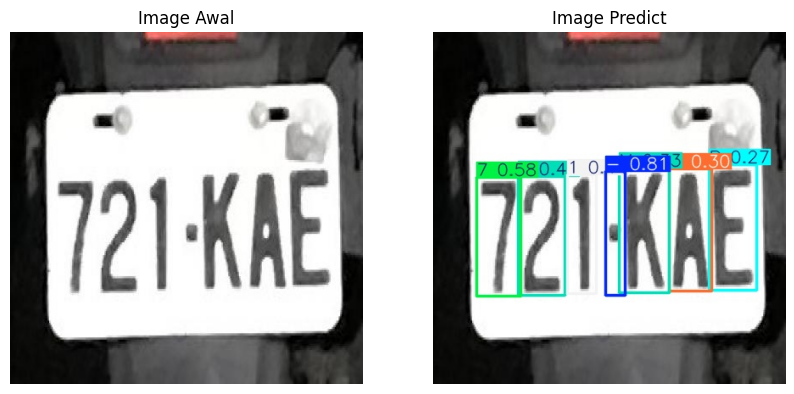

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the images
image1_path = '/content/test/images/carPlates_00195_jpg.rf.d6730747a4f35138f0ac41873448f2ba.jpg'
image2_path = '/content/runs/detect/predict/carPlates_00195_jpg.rf.d6730747a4f35138f0ac41873448f2ba.jpg'

# Open images using PIL
image1 = Image.open(image1_path)
image2 = Image.open(image2_path)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the first image
axes[0].imshow(image1)
axes[0].axis('off')  # Turn off axis labels
axes[0].set_title('Image Awal')

# Display the second image
axes[1].imshow(image2)
axes[1].axis('off')  # Turn off axis labels
axes[1].set_title('Image Predict')

# Show the plot
plt.show()